## Problem Statement: AllLife Credit Card Customer Segmentation

### Objective:

#### To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank. 

### Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

### DataSet Description as provided in the problem statement:-
Data is of various customers of a bank with their: 
- credit limit, 
- the total number of credit cards the customer has, and 
- different channels through which customer has contacted the bank for any queries, different channels include:
    - visiting the bank,
    - online and 
    - through a call centre. 

In [1]:
# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## We will first load the libraries for this project

# fundamental libraries
import numpy as np
import pandas as pd

# Standardization, spatial distance, cluster/hierarchy based modules
from scipy import stats
from scipy.stats import zscore # standardization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder # For standardization and encoding
from scipy.spatial.distance import cdist, pdist # spatial distances
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster # Hierarchical metrics and diagrams

# model libraries for building models. Linear regression problem.
from sklearn import cluster, model_selection, metrics

from sklearn.cluster import KMeans # For KMeans
from sklearn.cluster import AgglomerativeClustering # for Hierarchical Agglomerative Clustering

# Libraries for Data Split
from sklearn.model_selection import train_test_split

# metric libraries for comparing cluster
from sklearn.metrics import silhouette_score, silhouette_samples

#presentation and plotting libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import pandas_profiling
from IPython.display import Image  
import pydotplus as pydot


### Preprocessing:

In [3]:
# Read the dataset
credit_df=pd.read_excel("Credit Card Customer Data.xlsx")
credit_df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [4]:
# Top 10
credit_df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [5]:
# Bottom 10
credit_df.tail(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
650,651,78996,195000,10,1,12,2
651,652,78404,132000,9,1,12,2
652,653,28525,156000,8,1,8,0
653,654,51826,95000,10,0,15,1
654,655,65750,172000,10,1,9,1
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [6]:
# Shape of the data set:
print ("Shape of the given data set : ", credit_df.shape) # Shape of the dataset

Shape of the given data set :  (660, 7)


In [7]:
credit_df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [8]:
print("Dataset Information \n")
print("***************************************")
credit_df.info()

Dataset Information 

***************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [9]:
print("NULL CHECK \n")
print("***************************************")
print(credit_df.isnull().sum().to_frame())
print("\n\nNull Values anywhere : ", credit_df.isnull().values.any())
#Inference : No Nulls
#print("\n\nNull Values anywhere : ", concrete_df.isna().values.any())

NULL CHECK 

***************************************
                     0
Sl_No                0
Customer Key         0
Avg_Credit_Limit     0
Total_Credit_Cards   0
Total_visits_bank    0
Total_visits_online  0
Total_calls_made     0


Null Values anywhere :  False


In [10]:
credit_df[credit_df==0].count() # Take count for # of 0s

Sl_No                    0
Customer Key             0
Avg_Credit_Limit         0
Total_Credit_Cards       0
Total_visits_bank      100
Total_visits_online    144
Total_calls_made        97
dtype: int64

In [11]:
credit_df[credit_df['Customer Key'].duplicated()==True]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [12]:
credit_df[credit_df['Customer Key']== 47437]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


In [15]:
credit_df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [16]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


#### Steps 1&2:  Exploratory Data Quality Report Reflecting the Following:  

- 1. Perform univariate analysis on the data to better understand the variables at your
disposal and to get an idea about the no of clusters. Perform EDA, create
visualizations to explore data. (10 marks)
- 2. Properly comment on the codes, provide explanations of the steps taken in the
notebook and conclude your insights from the graphs. (5 marks)


### Preliminary Inference before diving into Univariate Analysis
    - The dataset concrete has 660 rows and 7 columns. 
    - All are numeric and is of Integer
    - Based on information function and null check, none of the variables have NULL values. No need for imputation 
    from that perspective. 
    - We don't see any negative values in any of the columns and also no non-numeric values. No imputation.    
    - We do see there are 5 rows that are getting duplicated based on functions used above. They can be a dropped. 
    But, I will keep this check at a later point as 5 rows constitute ~ 0.7% only. We can either keep or drop it           wouldn't matter
    - We see there are 0 values for the Contact fields viz. Total_visits_bank, total_visits_online,        total_calls_made - but these seem to be valid as these values mean the no. of mode of contact method with bank. So no imputation required.
    - The Sl.No and Customer_Key need to be dropped while performing the Clustering. As they are more of identifying (naming) the data point and is not a variable for the datapoint.
    - We had to standardize the data as "Avg_Credit_Limit" values will give wrong clustering if we don't. 
    - In terms of Outliers, we see outlier behavior in avg_credit_limit, total_visits_online. Need to see if imputation required.
    
### Note :  We will get into each of the variable analysis in the Univariate Analysis with details on distribution and tail analysis


## Univariate Analysis

#### The primary driver for below is to understand the whisker values for each of the numerical feature.

In [17]:
# name, range of values observed, central values (mean and median), standard deviation and quartiles, 
# analysis of the body of distributions / tails, missing values, outlier detection.

for feature in credit_df.columns: # Loop through all columns in the dataframe
        print("Feature is {0}".format(feature))
        print("******************")
        print("Range is {0}".format(credit_df[feature].max()-credit_df[feature].min()))
        print("Mean is {0}".format(credit_df[feature].mean()))
        print("Median is {0}".format(credit_df[feature].median()))
        print("Skewness is {0}".format(credit_df[feature].skew()))
        print("Std is {0}".format(credit_df[feature].std()))
        print("Quartiles are \n{0}".format(credit_df[feature].quantile([0.25, 0.5, 0.75])))
        IQR=credit_df[feature].quantile(0.75)-credit_df[feature].quantile(0.25)
        print("IQR is {0}".format(IQR))
        print('Max is {0}'.format(credit_df[feature].max()))
        print("Upper Whisker is {0}".format(credit_df[feature].quantile(0.75)+IQR*1.5))
        print("Lower Whisker is {0}".format(credit_df[feature].quantile(0.25)-IQR*1.5))
        print('Min is {0}'.format(credit_df[feature].min()))
        print("******************\n")

Feature is Sl_No
******************
Range is 659
Mean is 330.5
Median is 330.5
Skewness is 0.0
Std is 190.66987176793296
Quartiles are 
0.25    165.75
0.50    330.50
0.75    495.25
Name: Sl_No, dtype: float64
IQR is 329.5
Max is 660
Upper Whisker is 989.5
Lower Whisker is -328.5
Min is 1
******************

Feature is Customer Key
******************
Range is 88578
Mean is 55141.44393939394
Median is 53874.5
Skewness is 0.051461990601768696
Std is 25627.772200050327
Quartiles are 
0.25    33825.25
0.50    53874.50
0.75    77202.50
Name: Customer Key, dtype: float64
IQR is 43377.25
Max is 99843
Upper Whisker is 142268.375
Lower Whisker is -31240.625
Min is 11265
******************

Feature is Avg_Credit_Limit
******************
Range is 197000
Mean is 34574.242424242424
Median is 18000.0
Skewness is 2.202395623436587
Std is 37625.48780422165
Quartiles are 
0.25    10000.0
0.50    18000.0
0.75    48000.0
Name: Avg_Credit_Limit, dtype: float64
IQR is 38000.0
Max is 200000
Upper Whisker is 

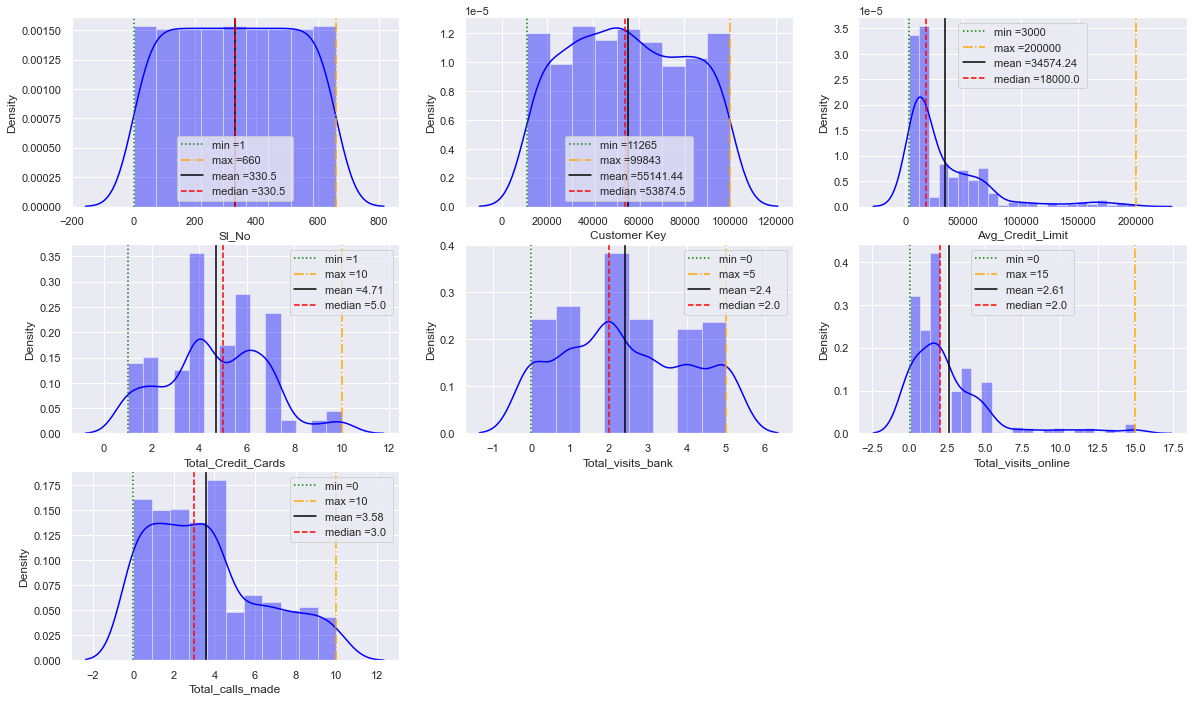

In [18]:
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in credit_df.columns:
    plt.subplot(4, 3, pos)
    ax=sns.distplot(credit_df[i], color='blue')
    plt.axvline(credit_df[i].min(),linestyle=":",label="min ={} ".format(round(credit_df[i].min(),2)), color='green')
    plt.axvline(credit_df[i].max(),linestyle="dashdot",label="max ={} ".format(round(credit_df[i].max(),2)), color='orange')
    plt.axvline(credit_df[i].mean(),linestyle="-",label="mean ={} ".format(round(credit_df[i].mean(),2)), color='black')
    plt.axvline(credit_df[i].median(),linestyle="--",label="median ={} ".format(credit_df[i].median()), color='red')
   # plt.axvline(concrete_df[i].mode()[0],linestyle=":",label="mode", color='green')
    plt.legend()
    pos+=1


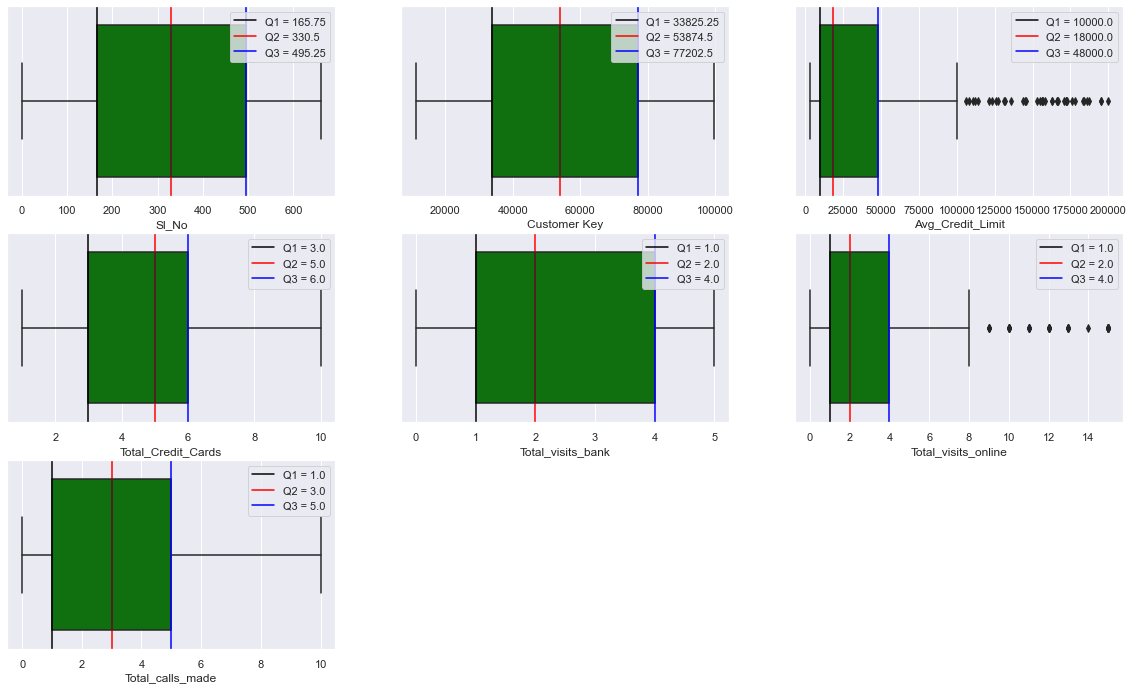

In [19]:
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in credit_df.columns:
    plt.subplot(4, 3, pos)
    ax=sns.boxplot(credit_df[i], color='green')
    plt.axvline(credit_df[i].quantile(0.25),linestyle="-",label='Q1 = {}'.format(round(credit_df[i].quantile(0.25),2)), color='black')
    plt.axvline(credit_df[i].quantile(0.5),linestyle="-", label='Q2 = {}'.format(round(credit_df[i].quantile(0.5),2)), color='red')
    plt.axvline(credit_df[i].quantile(0.75),linestyle="-",label='Q3 = {}'.format(round(credit_df[i].quantile(0.75),2)), color='blue')
    plt.legend()
    pos+=1

## Univariate Analysis INFERENCE - 
### please note - am not infering for Sl.No. and Customer_Key as these columns will be dropped

#### 1. Feature 'Avg_Credit_Limit'
- Seems to have 3 clusters
- Right skewed (Mean > Median). Right tailed.
- From the boxplot, it has quite a number of outliers above the upper whisker. This might need imputation, but I have decided to go against as this is financial data and dataset size is just 660. So, if I either use logarthimic or impute via median, I will be compromising the data. Let me check with and without treating outliers.
    
#### 2. Feature 'Total_Credit_Cards'
- Seems to have 4 clusters  
- Mean almost equal to Median. Very less skewness.
- No outliers

#### 3. Feature 'Total_visits_bank'
- Seems to have 3 clusters  
- Mean almost equal to Median. Very less skewness.
- No outliers

#### 4. Feature 'Total_visits_online'
- Seems to have 2 clusters  
- Mean slightly greater than Median. Right tailed.
- From the boxplot, it can be seen it has few outliers above the upper whisker. This might need imputation, but I have decided to go against as this is financial data and dataset size is just 660. So, if I either use logarthimic or impute via median, I will be compromising the data. Let me check with and without treating outliers.
    
#### 5. Feature 'Total_calls_made'
- Seems to have 2 clusters  
- Mean slightly greater than Median. Right tailed.
- No outliers.
    
   

#### ACTION ITEMS during Feature Engineering:
    - standardization
    - Outlier imputation for columns Avg_Credit_Limit, Total_visits_online {This I will keep it for iteration 2}

### BI-Variate Analysis
#### We will now analyze the correlation between the variables. Pls note, we won't infer anything for Sl_No and Customer_Key as these columns will be dropped as part of Feature Engineering.

In [20]:
credit_corr=credit_df.corr()

### Correlation Matrix

In [21]:
credit_corr

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.000000,0.052886,0.677962,0.739329,0.406438,0.033916,-0.684125
Customer Key,0.052886,1.000000,0.068604,-0.010281,-0.000560,0.022506,0.005968
Avg_Credit_Limit,0.677962,0.068604,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.739329,-0.010281,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,0.406438,-0.000560,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.033916,0.022506,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.684125,0.005968,-0.414352,-0.651251,-0.506016,0.127299,1.000000


### Heat Map for the correlation

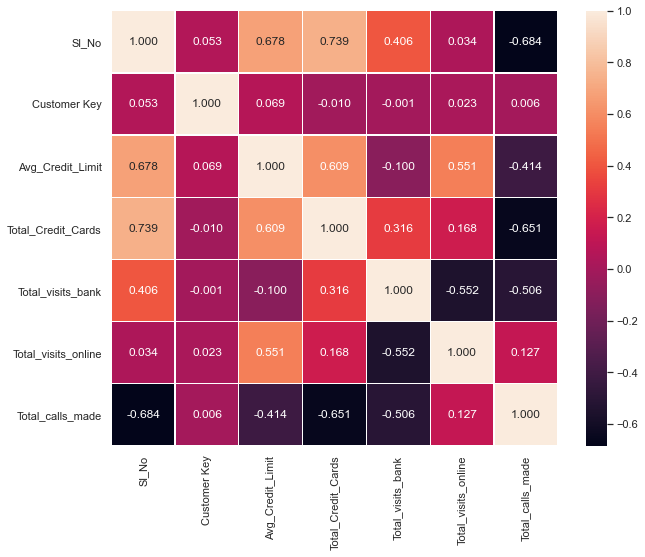

In [22]:
plt.figure(figsize= (10,8))
sns.heatmap(credit_corr,annot=True,cbar=True,linewidths=.2, fmt=".3f")
plt.show()

### Pairplot

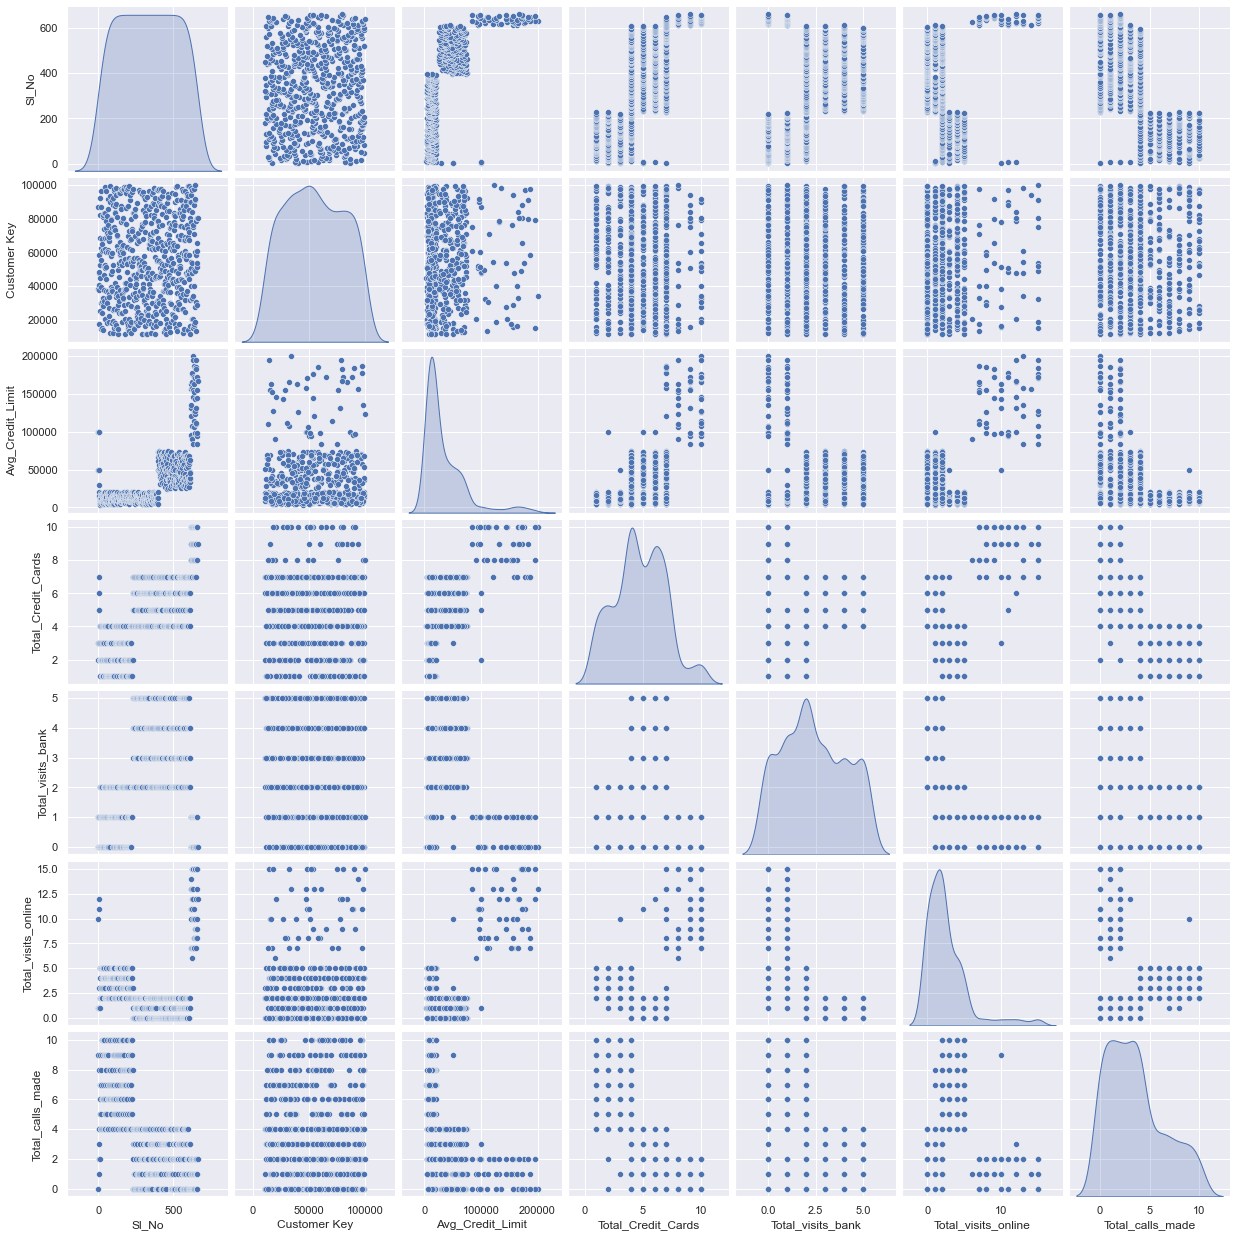

In [23]:
sns.pairplot(credit_df, diag_kind='kde')

## INFERENCE from above Correlation matrix, Heatmap, off-diagonal & pair-plots

### Note: We are concerned only for the 5 variables - Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank, Total_visits_online, and Total_calls_made.

### No. of clusters checking:
- From the diagonal we see that there are:
    - 3 clusters for Avg_Credit_Limit
    - 4 clusters for Total_Credit_Cards
    - 3 major clusters for Total_visits_bank
    - 2 clusters each for Total_visits_online and Total_calls_made

#### Initial thought about selecting no. of clusters: From the contact options of visit bank, online, calls made - we can in fact directly make 3 clusters. But, since the Total_Credit_Cards shows 4 distinct clusters, we will try 4 as an option too. But, we will check based on the elbow method.


### From Heatmap, pairplots we can see an interesting relation between the variables that will aid in segmentation of customers

- Avg_Credit_Limit has strong positive co-relation with Total_Credit_cards and Total_visits_online. While it has negative relation with Total_visits_bank and Total_calls_made mode.

- Total_Credit_Cards has positive relation with Avg_Credit_Limit and Total_visit_banks. While it has slight positive corelation Total_visit_online but negative with Total_calls_made mode.

#### We can intiutively (and preliminary) make a segmentation that customers with high avg credit limit will have high number of cards and they tend to prefer online communications. While, Customers whose avg_credit_limit is low but with high number of cards tend to prefer in person bank visitation. And customers with lower ave credit limit and number of credit cards tend to contact bank by phone.

#### The above market segmentation will become more clear on using clustering models.

### Feature Engineering techniques and "Get-the-Data-Ready" phase

   - We will make a copy of the original dataset and then drop the Sl.No and Customer_Key from the new dataset
   - We will create another copy of the new dataframe and treat one for outlier and another as-is
   - And finally standardize using zscore
   - We cannot extract new features based on the columns provided

## CREATING A NEW DATAFRAME WITH OUTLIERS TREATED

In [24]:
## credit_df is original dataset
## credit_outlier_df is dataset with outlier treatment

credit_outlier_df=credit_df.copy()
print(credit_outlier_df.shape)

## we decided to impute superplastic and age 
print("BEFORE IMPUTING Avg_Credit_Limit")
print("Quartiles are \n{0}".format(credit_outlier_df['Avg_Credit_Limit'].quantile([0.25, 0.5, 0.75])))
IQR1=credit_outlier_df['Avg_Credit_Limit'].quantile(0.75)-credit_outlier_df['Avg_Credit_Limit'].quantile(0.25)
print("IQR1 is {0}".format(IQR1))
print('Max is {0}'.format(credit_outlier_df['Avg_Credit_Limit'].max()))
upper_whskr1=credit_outlier_df['Avg_Credit_Limit'].quantile(0.75)+IQR1*1.5
lower_whskr1=credit_outlier_df['Avg_Credit_Limit'].quantile(0.25)-IQR1*1.5
print("Upper Whisker is {0}".format(upper_whskr1))
print("Lower Whisker is {0}".format(lower_whskr1))
print('Min is {0}'.format(credit_outlier_df['Avg_Credit_Limit'].min()))
print("Std is {0}".format(credit_outlier_df['Avg_Credit_Limit'].std()))
print('Count of - outliers Avg_Credit_Limit {}'.format(
    credit_outlier_df[(credit_outlier_df['Avg_Credit_Limit']>upper_whskr1)| (credit_outlier_df['Avg_Credit_Limit']<lower_whskr1) ]['Avg_Credit_Limit'].value_counts().sum()))
print('\nRecords of Outliers\n',credit_outlier_df[(credit_outlier_df['Avg_Credit_Limit']>upper_whskr1)| (credit_outlier_df['Avg_Credit_Limit']<lower_whskr1) ]['Avg_Credit_Limit'])

(660, 7)
BEFORE IMPUTING Avg_Credit_Limit
Quartiles are 
0.25    10000.0
0.50    18000.0
0.75    48000.0
Name: Avg_Credit_Limit, dtype: float64
IQR1 is 38000.0
Max is 200000
Upper Whisker is 105000.0
Lower Whisker is -47000.0
Min is 3000
Std is 37625.48780422165
Count of - outliers Avg_Credit_Limit 39

Records of Outliers
 612    157000
614    163000
615    131000
617    136000
618    121000
619    158000
620    108000
621    166000
622    176000
623    166000
624    178000
626    156000
627    146000
629    155000
630    200000
631    195000
632    187000
633    163000
634    106000
635    114000
636    126000
637    173000
638    153000
639    184000
640    123000
641    144000
644    127000
645    171000
646    186000
647    183000
648    111000
649    112000
650    195000
651    132000
652    156000
654    172000
657    145000
658    172000
659    167000
Name: Avg_Credit_Limit, dtype: int64


DISTRIBUTION BEFORE 
+++++++++++++++++++++++++++++++


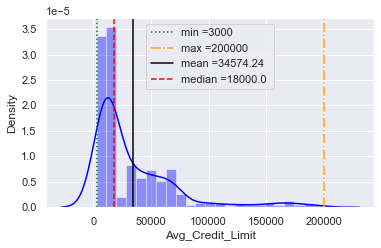

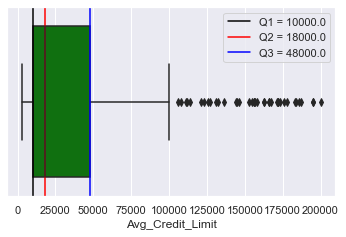

In [25]:
print("DISTRIBUTION BEFORE ")
print("+++++++++++++++++++++++++++++++")
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['Avg_Credit_Limit']:
    plt.subplot(4, 3, pos)
    ax=sns.distplot(credit_outlier_df[i], color='blue')
    plt.axvline(credit_outlier_df[i].min(),linestyle=":",label="min ={} ".format(round(credit_outlier_df[i].min(),2)), color='green')
    plt.axvline(credit_outlier_df[i].max(),linestyle="dashdot",label="max ={} ".format(round(credit_outlier_df[i].max(),2)), color='orange')
    plt.axvline(credit_outlier_df[i].mean(),linestyle="-",label="mean ={} ".format(round(credit_outlier_df[i].mean(),2)), color='black')
    plt.axvline(credit_outlier_df[i].median(),linestyle="--",label="median ={} ".format(credit_outlier_df[i].median()), color='red')
   # plt.axvline(credit_outlier_df[i].mode()[0],linestyle=":",label="mode", color='green')
    plt.legend()
    pos+=1
    
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['Avg_Credit_Limit']:
    plt.subplot(4, 3, pos)
    ax=sns.boxplot(credit_outlier_df[i], color='green')
    plt.axvline(credit_outlier_df[i].quantile(0.25),linestyle="-",label='Q1 = {}'.format(round(credit_outlier_df[i].quantile(0.25),2)), color='black')
    plt.axvline(credit_outlier_df[i].quantile(0.5),linestyle="-", label='Q2 = {}'.format(round(credit_outlier_df[i].quantile(0.5),2)), color='red')
    plt.axvline(credit_outlier_df[i].quantile(0.75),linestyle="-",label='Q3 = {}'.format(round(credit_outlier_df[i].quantile(0.75),2)), color='blue')
    plt.legend()
    pos+=1

In [26]:
credit_outlier_df['Avg_Credit_Limit'].mean()

34574.242424242424

In [27]:
print('ACTUAL IMPUTING by MEAN value for rows that has values greater than upperwhisker and lower than lower whisker based on 5 point summary\n')
credit_outlier_df.loc[(credit_outlier_df['Avg_Credit_Limit']>upper_whskr1)|(credit_outlier_df['Avg_Credit_Limit']<lower_whskr1), 'Avg_Credit_Limit']=credit_outlier_df['Avg_Credit_Limit'].mean()


ACTUAL IMPUTING by MEAN value for rows that has values greater than upperwhisker and lower than lower whisker based on 5 point summary



In [28]:
print("AFTER IMPUTING Avg_Credit_Limit")
print("Quartiles are \n{0}".format(credit_outlier_df['Avg_Credit_Limit'].quantile([0.25, 0.5, 0.75])))
IQR2=credit_outlier_df['Avg_Credit_Limit'].quantile(0.75)-credit_outlier_df['Avg_Credit_Limit'].quantile(0.25)
print("IQR2 is {0}".format(IQR2))
print('Max is {0}'.format(credit_outlier_df['Avg_Credit_Limit'].max()))
upper_whskr2=credit_outlier_df['Avg_Credit_Limit'].quantile(0.75)+IQR1*1.5
lower_whskr2=credit_outlier_df['Avg_Credit_Limit'].quantile(0.25)-IQR1*1.5
print("Upper Whisker is {0}".format(upper_whskr2))
print("Lower Whisker is {0}".format(lower_whskr2))
print('Min is {0}'.format(credit_outlier_df['Avg_Credit_Limit'].min()))
print("Std is {0}".format(credit_outlier_df['Avg_Credit_Limit'].std()))
print('Count of - outliers Avg_Credit_Limit {}'.format(
    credit_outlier_df[(credit_outlier_df['Avg_Credit_Limit']>upper_whskr2)| (credit_outlier_df['Avg_Credit_Limit']<lower_whskr2) ]['Avg_Credit_Limit'].value_counts().sum()))
print('\nRecords of Outliers\n',credit_outlier_df[(credit_outlier_df['Avg_Credit_Limit']>upper_whskr2)| (credit_outlier_df['Avg_Credit_Limit']<lower_whskr2) ]['Avg_Credit_Limit'])

AFTER IMPUTING Avg_Credit_Limit
Quartiles are 
0.25    10000.0
0.50    18000.0
0.75    38250.0
Name: Avg_Credit_Limit, dtype: float64
IQR2 is 28250.0
Max is 100000.0
Upper Whisker is 95250.0
Lower Whisker is -47000.0
Min is 3000.0
Std is 21851.998511327845
Count of - outliers Avg_Credit_Limit 7

Records of Outliers
 0      100000.0
4      100000.0
6      100000.0
616     96000.0
642     97000.0
643     98000.0
655     99000.0
Name: Avg_Credit_Limit, dtype: float64


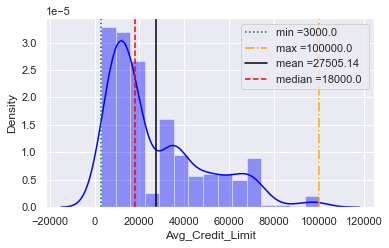

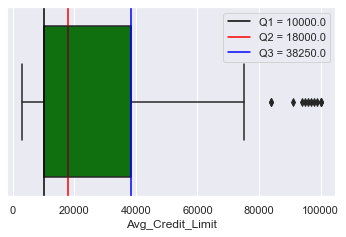

In [29]:
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['Avg_Credit_Limit']:
    plt.subplot(4, 3, pos)
    ax=sns.distplot(credit_outlier_df[i], color='blue')
    plt.axvline(credit_outlier_df[i].min(),linestyle=":",label="min ={} ".format(round(credit_outlier_df[i].min(),2)), color='green')
    plt.axvline(credit_outlier_df[i].max(),linestyle="dashdot",label="max ={} ".format(round(credit_outlier_df[i].max(),2)), color='orange')
    plt.axvline(credit_outlier_df[i].mean(),linestyle="-",label="mean ={} ".format(round(credit_outlier_df[i].mean(),2)), color='black')
    plt.axvline(credit_outlier_df[i].median(),linestyle="--",label="median ={} ".format(credit_outlier_df[i].median()), color='red')
   # plt.axvline(credit_outlier_df[i].mode()[0],linestyle=":",label="mode", color='green')
    plt.legend()
    pos+=1
    
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['Avg_Credit_Limit']:
    plt.subplot(4, 3, pos)
    ax=sns.boxplot(credit_outlier_df[i], color='green')
    plt.axvline(credit_outlier_df[i].quantile(0.25),linestyle="-",label='Q1 = {}'.format(round(credit_outlier_df[i].quantile(0.25),2)), color='black')
    plt.axvline(credit_outlier_df[i].quantile(0.5),linestyle="-", label='Q2 = {}'.format(round(credit_outlier_df[i].quantile(0.5),2)), color='red')
    plt.axvline(credit_outlier_df[i].quantile(0.75),linestyle="-",label='Q3 = {}'.format(round(credit_outlier_df[i].quantile(0.75),2)), color='blue')
    plt.legend()
    pos+=1

In [30]:
print("BEFORE IMPUTING Total_visits_online")
print("Quartiles are \n{0}".format(credit_outlier_df['Total_visits_online'].quantile([0.25, 0.5, 0.75])))
IQR1=credit_outlier_df['Total_visits_online'].quantile(0.75)-credit_outlier_df['Total_visits_online'].quantile(0.25)
print("IQR1 is {0}".format(IQR1))
print('Max is {0}'.format(credit_outlier_df['Total_visits_online'].max()))
upper_whskr1=credit_outlier_df['Total_visits_online'].quantile(0.75)+IQR1*1.5
lower_whskr1=credit_outlier_df['Total_visits_online'].quantile(0.25)-IQR1*1.5
print("Upper Whisker is {0}".format(upper_whskr1))
print("Lower Whisker is {0}".format(lower_whskr1))
print('Min is {0}'.format(credit_outlier_df['Total_visits_online'].min()))
print("Std is {0}".format(credit_outlier_df['Total_visits_online'].std()))
print('Count of - outliers Total_visits_online {}'.format(
    credit_outlier_df[(credit_outlier_df['Total_visits_online']>upper_whskr1)| (credit_outlier_df['Total_visits_online']<lower_whskr1) ]['Total_visits_online'].value_counts().sum()))
print('\nRecords of Outliers\n',credit_outlier_df[(credit_outlier_df['Total_visits_online']>upper_whskr1)| (credit_outlier_df['Total_visits_online']<lower_whskr1) ]['Total_visits_online'])

BEFORE IMPUTING Total_visits_online
Quartiles are 
0.25    1.0
0.50    2.0
0.75    4.0
Name: Total_visits_online, dtype: float64
IQR1 is 3.0
Max is 15
Upper Whisker is 8.5
Lower Whisker is -3.5
Min is 0
Std is 2.9357241204935414
Count of - outliers Total_visits_online 37

Records of Outliers
 1      10
4      12
6      11
612    14
613    11
615    10
616    11
617    13
618    13
619    13
620    15
621    12
622    15
624    11
626    10
627    12
628    15
630    13
631    15
633    10
637    11
639    15
640    15
641    10
642     9
644    15
645    15
647     9
650    12
651    12
653    15
654     9
655    10
656    13
657     9
658    15
659    12
Name: Total_visits_online, dtype: int64


DISTRIBUTION BEFORE 
+++++++++++++++++++++++++++++++


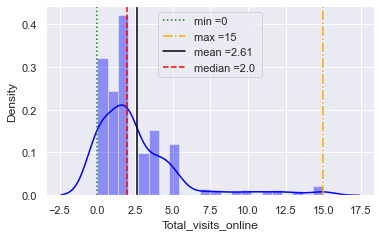

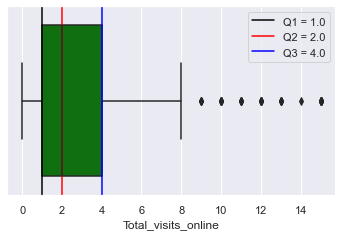

In [31]:
print("DISTRIBUTION BEFORE ")
print("+++++++++++++++++++++++++++++++")
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['Total_visits_online']:
    plt.subplot(4, 3, pos)
    ax=sns.distplot(credit_outlier_df[i], color='blue')
    plt.axvline(credit_outlier_df[i].min(),linestyle=":",label="min ={} ".format(round(credit_outlier_df[i].min(),2)), color='green')
    plt.axvline(credit_outlier_df[i].max(),linestyle="dashdot",label="max ={} ".format(round(credit_outlier_df[i].max(),2)), color='orange')
    plt.axvline(credit_outlier_df[i].mean(),linestyle="-",label="mean ={} ".format(round(credit_outlier_df[i].mean(),2)), color='black')
    plt.axvline(credit_outlier_df[i].median(),linestyle="--",label="median ={} ".format(credit_outlier_df[i].median()), color='red')
   # plt.axvline(credit_outlier_df[i].mode()[0],linestyle=":",label="mode", color='green')
    plt.legend()
    pos+=1
    
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['Total_visits_online']:
    plt.subplot(4, 3, pos)
    ax=sns.boxplot(credit_outlier_df[i], color='green')
    plt.axvline(credit_outlier_df[i].quantile(0.25),linestyle="-",label='Q1 = {}'.format(round(credit_outlier_df[i].quantile(0.25),2)), color='black')
    plt.axvline(credit_outlier_df[i].quantile(0.5),linestyle="-", label='Q2 = {}'.format(round(credit_outlier_df[i].quantile(0.5),2)), color='red')
    plt.axvline(credit_outlier_df[i].quantile(0.75),linestyle="-",label='Q3 = {}'.format(round(credit_outlier_df[i].quantile(0.75),2)), color='blue')
    plt.legend()
    pos+=1

In [32]:
print('ACTUAL IMPUTING by MEAN value for rows that has values greater than upperwhisker or lesser than lower whisjer based on 5 point summary\n')
credit_outlier_df.loc[(credit_outlier_df['Total_visits_online']>upper_whskr1)|(credit_outlier_df['Total_visits_online']<lower_whskr1), 'Total_visits_online']=credit_outlier_df['Total_visits_online'].mean()


ACTUAL IMPUTING by MEAN value for rows that has values greater than upperwhisker or lesser than lower whisjer based on 5 point summary



In [33]:
print("AFTER IMPUTING Total_visits_online")
print("Quartiles are \n{0}".format(credit_outlier_df['Total_visits_online'].quantile([0.25, 0.5, 0.75])))
IQR2=credit_outlier_df['Total_visits_online'].quantile(0.75)-credit_outlier_df['Total_visits_online'].quantile(0.25)
print("IQR2 is {0}".format(IQR2))
print('Max is {0}'.format(credit_outlier_df['Total_visits_online'].max()))
upper_whskr2=credit_outlier_df['Total_visits_online'].quantile(0.75)+IQR1*1.5
lower_whskr2=credit_outlier_df['Total_visits_online'].quantile(0.25)-IQR1*1.5
print("Upper Whisker is {0}".format(upper_whskr2))
print("Lower Whisker is {0}".format(lower_whskr2))
print('Min is {0}'.format(credit_outlier_df['Total_visits_online'].min()))
print("Std is {0}".format(credit_outlier_df['Total_visits_online'].std()))
print('Count of - outliers Total_visits_online {}'.format(
    credit_outlier_df[(credit_outlier_df['Total_visits_online']>upper_whskr2)| (credit_outlier_df['Total_visits_online']<lower_whskr2) ]['Total_visits_online'].value_counts().sum()))
print('\nRecords of Outliers\n',credit_outlier_df[(credit_outlier_df['Total_visits_online']>upper_whskr2)| (credit_outlier_df['Total_visits_online']<lower_whskr2) ]['Total_visits_online'])

AFTER IMPUTING Total_visits_online
Quartiles are 
0.25    1.0
0.50    2.0
0.75    3.0
Name: Total_visits_online, dtype: float64
IQR2 is 2.0
Max is 8.0
Upper Whisker is 7.5
Lower Whisker is -3.5
Min is 0.0
Std is 1.701824548990261
Count of - outliers Total_visits_online 6

Records of Outliers
 634    8.0
636    8.0
643    8.0
646    8.0
649    8.0
652    8.0
Name: Total_visits_online, dtype: float64


DISTRIBUTION after 
+++++++++++++++++++++++++++++++


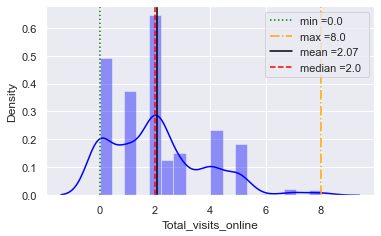

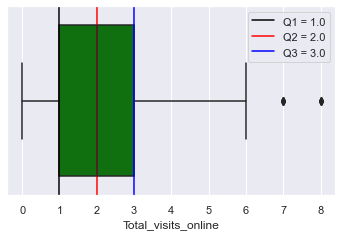

In [34]:
print("DISTRIBUTION after ")
print("+++++++++++++++++++++++++++++++")
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['Total_visits_online']:
    plt.subplot(4, 3, pos)
    ax=sns.distplot(credit_outlier_df[i], color='blue')
    plt.axvline(credit_outlier_df[i].min(),linestyle=":",label="min ={} ".format(round(credit_outlier_df[i].min(),2)), color='green')
    plt.axvline(credit_outlier_df[i].max(),linestyle="dashdot",label="max ={} ".format(round(credit_outlier_df[i].max(),2)), color='orange')
    plt.axvline(credit_outlier_df[i].mean(),linestyle="-",label="mean ={} ".format(round(credit_outlier_df[i].mean(),2)), color='black')
    plt.axvline(credit_outlier_df[i].median(),linestyle="--",label="median ={} ".format(credit_outlier_df[i].median()), color='red')
   # plt.axvline(credit_outlier_df[i].mode()[0],linestyle=":",label="mode", color='green')
    plt.legend()
    pos+=1
    
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['Total_visits_online']:
    plt.subplot(4, 3, pos)
    ax=sns.boxplot(credit_outlier_df[i], color='green')
    plt.axvline(credit_outlier_df[i].quantile(0.25),linestyle="-",label='Q1 = {}'.format(round(credit_outlier_df[i].quantile(0.25),2)), color='black')
    plt.axvline(credit_outlier_df[i].quantile(0.5),linestyle="-", label='Q2 = {}'.format(round(credit_outlier_df[i].quantile(0.5),2)), color='red')
    plt.axvline(credit_outlier_df[i].quantile(0.75),linestyle="-",label='Q3 = {}'.format(round(credit_outlier_df[i].quantile(0.75),2)), color='blue')
    plt.legend()
    pos+=1

### Outlier treatment for avg_credit_limit and total_visits_online
#### A. I used mean for treating superplastic as it made the # of outliers to 7 from 39 and also the outlier value is very close to upper whisker
#### B. I used mean for treating age even though the # of outliers reduced from37 to 8, the outlier value is very close to upper whisker. 

In [35]:
# Original Dataset
print(credit_df.shape)
print("NULL CHECK \n")
print("***************************************")
print(credit_df.isnull().sum().to_frame())
print("\n\nNull Values anywhere : ", credit_df.isnull().values.any())
#Inference : No Nulls
#print("\n\nNull Values anywhere : ", credit_outlier_df.isna().values.any())

(660, 7)
NULL CHECK 

***************************************
                     0
Sl_No                0
Customer Key         0
Avg_Credit_Limit     0
Total_Credit_Cards   0
Total_visits_bank    0
Total_visits_online  0
Total_calls_made     0


Null Values anywhere :  False


In [36]:
#outlier treated dataset
print(credit_outlier_df.shape)
print("NULL CHECK \n")
print("***************************************")
print(credit_outlier_df.isnull().sum().to_frame())
print("\n\nNull Values anywhere : ", credit_outlier_df.isnull().values.any())
#Inference : No Nulls
#print("\n\nNull Values anywhere : ", credit_outlier_df.isna().values.any())

(660, 7)
NULL CHECK 

***************************************
                     0
Sl_No                0
Customer Key         0
Avg_Credit_Limit     0
Total_Credit_Cards   0
Total_visits_bank    0
Total_visits_online  0
Total_calls_made     0


Null Values anywhere :  False


## Now, from the outlier treated dataset drop the SlNo and the Customer Key as these only identify (or name) the datapoints and will not be useful for segregation.

In [37]:
# Now we don't need Sl_No and Customer Key. So drop them.

credit_outlier_df.drop(['Sl_No', 'Customer Key'], axis=1, inplace=True)
credit_outlier_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000.000000,2,1,1.000000,0
1,50000.000000,3,0,2.606061,9
2,50000.000000,7,1,3.000000,4
3,30000.000000,5,1,1.000000,4
4,100000.000000,6,0,2.606061,3
...,...,...,...,...,...
655,99000.000000,10,1,2.606061,0
656,84000.000000,10,1,2.606061,2
657,34574.242424,8,1,2.606061,1
658,34574.242424,10,1,2.606061,0


## DROPPING FEATURES AND CREATING A NEW DataFrame

### For dropping of features, we drop the Sl.No and the Customer_Key. They are mainly identifying the datapoints and not needed for the clustering.

In [39]:
## Drop features
credit_drop_df=credit_df.copy()
print(credit_drop_df.shape)

credit_drop_df.drop(['Sl_No', 'Customer Key'], axis=1, inplace=True)
credit_drop_df

credit_drop_df_1=credit_drop_df.copy()

(660, 7)


In [40]:
credit_drop_df_1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [41]:
credit_drop_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [42]:
#dropped feature treated dataset
print(credit_drop_df.shape)
print("NULL CHECK \n")
print("***************************************")
print(credit_drop_df.isnull().sum().to_frame())
print("\n\nNull Values anywhere : ", credit_drop_df.isnull().values.any())
#Inference : No Nulls
#print("\n\nNull Values anywhere : ", credit_drop_df.isna().values.any())

(660, 5)
NULL CHECK 

***************************************
                     0
Avg_Credit_Limit     0
Total_Credit_Cards   0
Total_visits_bank    0
Total_visits_online  0
Total_calls_made     0


Null Values anywhere :  False


In [43]:
# so we have 3 datasets
print('credit_df is original', credit_df.shape)
print('credit_drop_df has 2 columns dropped', credit_drop_df.shape)
print('credit_outlier_df is imputed for outliers & dropped 2 columns',credit_outlier_df.shape)

credit_df is original (660, 7)
credit_drop_df has 2 columns dropped (660, 5)
credit_outlier_df is imputed for outliers & dropped 2 columns (660, 5)


## STANDARDIZATION

In [44]:
credit_drop_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [45]:
# Standardize credit_drop_df - the original dataset with dropped columns - using the zscore

credit_drop_df_z=credit_drop_df.apply(zscore)
credit_drop_df_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [47]:
credit_drop_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [46]:
credit_outlier_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000.0,2,1,1.000000,0
1,50000.0,3,0,2.606061,9
2,50000.0,7,1,3.000000,4
3,30000.0,5,1,1.000000,4
4,100000.0,6,0,2.606061,3


In [48]:
# Standardize credit_outlier_df - the original dataset treated with outliers and dropped columns - using the zscore

credit_outlier_df_z=credit_outlier_df.apply(zscore)
credit_outlier_df_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,3.320055,-1.249225,-0.860451,-0.627632,-1.251537
1,1.030199,-0.787585,-1.473731,0.316813,1.891859
2,1.030199,1.058973,-0.860451,0.548469,0.145528
3,0.114257,0.135694,-0.860451,-0.627632,0.145528
4,3.320055,0.597334,-1.473731,0.316813,-0.203739


### Step 3:   Execute K-means clustering use elbow plot and analyse clusters using boxplot

### Please note, I have decided not to use outlier treated dataset as this is financial data, there may be cases of customers having high crdt limit or can have more transactions made during online. So, we might be compromising valuable information.

# K-Means Clustering

## ITERATION 1: USING THE Z-Scaled Dropped (columns SlNo, Customer Key) Dataframe : credit_drop_df_z

In [49]:
credit_drop_df_z

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


Text(0.5, 1.0, 'Selecting k with the Elbow Method Using CDIST')

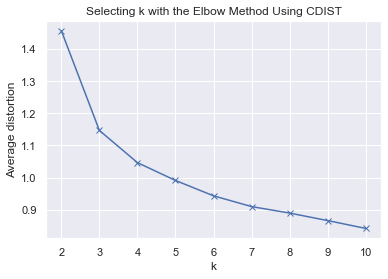

In [55]:
# Try with a range of clusters
start=2 # did not use 1 as single cluster doesn't make sense.
end=11
clusters=range(start, end) 
meanDistortions=[]
clusterIntertia=[]
silhouette=[]
for k in clusters:
    model=KMeans(n_clusters=k, n_init=10, random_state=6579)
    model.fit(credit_drop_df_z)
    prediction=model.predict(credit_drop_df_z)
    dist=sum(np.min(cdist(credit_drop_df_z, model.cluster_centers_, 'euclidean'), axis=1))/ credit_drop_df_z.shape[0]
    meanDistortions.append(dist)
    clusterIntertia.append(model.inertia_)
    sil=silhouette_score(credit_drop_df_z, model.labels_, metric='euclidean')
    silhouette.append(sil)
    #print("k = {}".format(k), prediction)
    #print("k ={} and dist = {}".format(k, dist))
    
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method Using CDIST')

Text(0.5, 1.0, 'Selecting k with the Elbow Method Using Inertia')

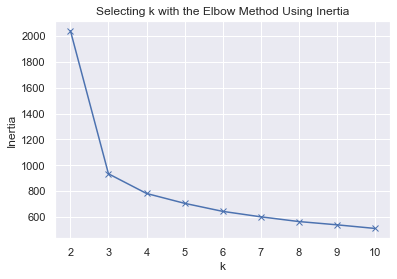

In [56]:
plt.plot(clusters, clusterIntertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Selecting k with the Elbow Method Using Inertia')

Text(0.5, 1.0, 'Selecting k with the Elbow Method Using Silhouette')

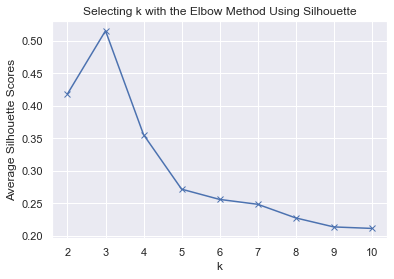

In [57]:
plt.plot(clusters, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Silhouette Scores')
plt.title('Selecting k with the Elbow Method Using Silhouette')

In [66]:
print("\nCluster Labels Mapped to Datapoints are :\n")
print(prediction) # gives the cluster labels for each datapoint for the last model..(k=10)
print("\nCluster Centroids are :\n")
print(model.cluster_centers_)# gives the centroid of each clusters for each datapoint for the last model..(k=10)
print("\nCluster Interia is :\n")
print(clusterIntertia) #gives for each cluster, the inertia value which is the sum of sqd distances of datapoint to the closest centroid



Cluster Labels Mapped to Datapoints are :

[6 8 6 4 7 8 2 1 1 1 1 1 8 1 5 1 1 1 5 8 5 1 1 1 8 8 8 8 1 1 1 1 8 1 8 1 8
 1 8 8 8 5 5 1 5 8 5 5 8 5 8 1 8 8 8 5 1 8 1 8 1 8 1 1 8 1 1 5 8 5 5 5 1 1
 8 1 5 1 8 5 5 1 1 1 5 1 5 1 8 5 1 8 1 5 5 5 5 1 8 1 1 8 8 1 8 8 1 5 5 5 5
 8 8 1 1 5 1 1 1 8 5 8 5 8 5 1 8 8 1 1 1 1 1 8 1 5 8 8 8 8 8 1 8 1 5 1 8 5
 8 5 8 1 5 1 8 1 5 5 8 5 8 5 1 8 8 8 1 5 8 5 8 5 1 8 5 1 5 8 5 5 1 8 1 5 1
 1 5 5 1 5 8 1 1 5 1 8 8 5 5 8 8 8 8 1 5 1 1 5 8 8 1 1 1 8 8 1 1 1 1 8 8 5
 8 8 8 1 5 5 4 4 0 4 0 4 9 9 9 9 4 4 4 0 4 9 4 4 0 4 9 9 4 4 0 4 4 0 4 9 4
 0 0 4 0 4 0 9 9 9 9 0 0 4 4 9 0 4 0 0 9 9 9 4 4 4 4 0 0 4 4 9 4 4 4 4 9 9
 0 9 9 9 9 9 4 0 0 9 4 4 0 9 0 4 4 5 4 4 9 0 9 4 9 9 4 4 0 0 0 0 0 9 4 9 4
 0 9 9 0 4 4 4 4 4 9 4 4 9 4 4 0 4 4 4 4 0 9 0 9 0 4 4 4 4 0 4 9 9 9 4 4 9
 4 4 9 0 9 4 0 4 9 4 4 4 4 4 0 9 4 4 0 0 4 0 0 4 9 0 3 6 6 6 6 3 6 6 6 6 6
 3 6 6 6 0 9 9 6 6 6 3 6 3 6 3 6 6 0 6 6 9 3 0 3 3 6 6 6 3 6 6 4 3 6 4 6 3
 3 9 3 6 0 6 6 0 3 3 4 6 9 6 6 3 9 0 3 0 6 3 6 0 0 6 0 6

In [67]:
print("\n SILHOUETTE SCORES\n")
silhouette


 SILHOUETTE SCORES



[0.41842496663215445,
 0.5157182558881063,
 0.3556670619372605,
 0.2717470361089752,
 0.2559585329098069,
 0.24847787091758058,
 0.22747778906933228,
 0.21360750444561508,
 0.2113138671328702]

### Based on above elbow graphs, cluster size of 3 seems to be optimal when the drop starts to decrease more linearly and silhouette score is maximum as well.

## ITERATION with k=3

In [68]:
# CLUSTERING WITH 3 CLUSTERS

model3 = KMeans(n_clusters=3, n_init = 10, random_state=6579)
model3.fit(credit_drop_df_z)

KMeans(n_clusters=3, random_state=6579)

In [69]:
prediction3=model3.predict(credit_drop_df_z)
#Append the prediction 
credit_df["CLUSTER#"] = prediction3
credit_drop_df_z["CLUSTER#"] = prediction3
print("Clusters Assigned : \n")
credit_df.head()

Clusters Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,CLUSTER#
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,2


In [70]:
credit_df['CLUSTER#'].value_counts()

1    386
0    224
2     50
Name: CLUSTER#, dtype: int64

In [71]:
# Provides count for each cluster
credit_df.groupby('CLUSTER#').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
CLUSTER#,,,,,,,
0,224,224,224,224,224,224,224
1,386,386,386,386,386,386,386
2,50,50,50,50,50,50,50


In [72]:
# This provides each cluster's mean values across the variables.
credit_df.groupby('CLUSTER#').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
CLUSTER#,,,,,,,
0,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
1,417.528497,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000289BC6A0550>,
      dtype=object)

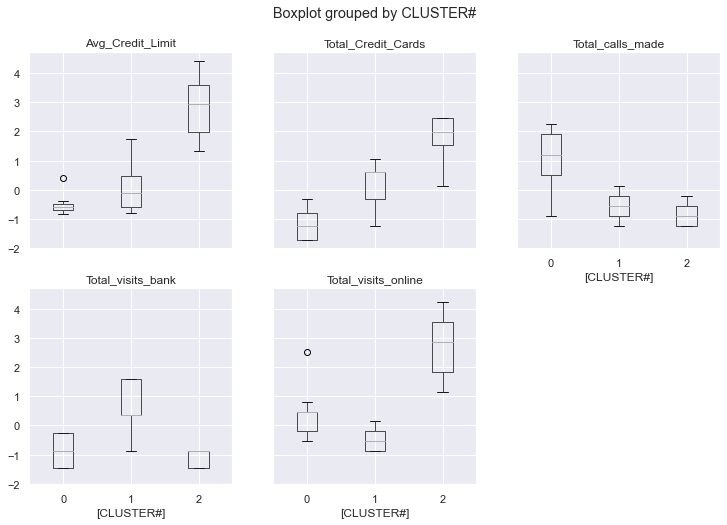

In [73]:
credit_drop_df_z.boxplot(by='CLUSTER#', layout = (2,3),figsize=(12,8)) # use the scaled df as we are concentrated on the ones to which clustering is made

In [74]:
# Silhouette Score
silhouette_score(credit_drop_df_z, model3.labels_, metric='euclidean')

# from SKLEARN : 
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters

0.5397786437631975

In [75]:
sample_silhouette_values = silhouette_samples(credit_drop_df_z, model3.labels_)
sample_silhouette_values

array([0.1672829 , 0.42615985, 0.227138  , 0.13709352, 0.51229673,
       0.56460883, 0.44944373, 0.14327973, 0.33852406, 0.50189466,
       0.5136892 , 0.61267123, 0.59338407, 0.63193831, 0.58264897,
       0.66480166, 0.47059973, 0.5364654 , 0.56150456, 0.58527162,
       0.48001725, 0.66589079, 0.55587411, 0.51869874, 0.60695613,
       0.61525262, 0.6348208 , 0.54731765, 0.6543443 , 0.59773662,
       0.48626332, 0.62117781, 0.61955043, 0.62799368, 0.55854307,
       0.54177961, 0.61875166, 0.6519061 , 0.55727561, 0.60923893,
       0.51295935, 0.62514232, 0.22093085, 0.54016873, 0.38019734,
       0.59145452, 0.47469542, 0.52625615, 0.56385255, 0.47395528,
       0.64203914, 0.59931647, 0.67000968, 0.63737685, 0.66401365,
       0.4019726 , 0.5631703 , 0.60663212, 0.66103091, 0.58608756,
       0.57961152, 0.55746334, 0.50643373, 0.63091517, 0.6423687 ,
       0.52844353, 0.63850257, 0.38116531, 0.57809066, 0.58104574,
       0.60135745, 0.52403527, 0.57486002, 0.60857675, 0.66730

## INFERENCE with k=3

#### From the box plot and the mean & count values of variables when grouped by Cluster#, we observe the following customer segmentation:

- The cluster 0 denotes customers with least avg_Credit_limit (12K) and least total_credit_cards (mean 2.5). The no. of customers in this segement is 223 about 33% of the total datasample. We can further observe that this segment of customers prefer Call method to contact bank followed by visiting online. (this is given by the mean and the boxplot). They tend not to visit bank in person often.


- The cluster 1 denotes customers with middle avg_Credit_limit (~34K) and middle total_credit_cards (mean 5.5). The no. of customers in this segement is the maximum (387) that is ~60% of the total datasample. We can further observe that this segment of customers prefer in-person while contacting bank followed by calling. (this is given by the mean and the boxplot). They tend not to visit online often.


- The cluster 2 denotes customers with highest avg_Credit_limit (~141K) and highest total_credit_cards (mean 8.75). The no. of customers in this segement is the least (50) that is < 10% of the total datasample. We can further observe that this segment of customers prefer online method of communication with the bank.



- SILHOUETTE SCORE when k=3 is : 0.5399

# HIERARCHICAL CLUSTERING

In [91]:
# Execute hierarchical clustering with different linkages with help of different dendrograms and cophenetic coeff. 
# Analyze clusters formed using Boxplot

# First get the clean datasets
credit_df_h=credit_df.copy()
credit_df_h.head()
credit_df_h.drop(['CLUSTER#'], axis=1, inplace=True)

credit_df_h.head() # original dataset for hierarchical clustering

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [95]:
credit_drop_df_h=credit_drop_df.copy()
credit_drop_df_h.head()
credit_drop_df_hz=credit_drop_df_h.apply(zscore)
credit_drop_df_hz.head() #dropped the slno, customerkey and then scaled with z. This will be used for clustering

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


### We will first check with different combination of metric and method, using linkage method, which gives the best cophenetic index. 
##### (#cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram closer it is to 1, the better is the clustering)

#### 'metric' to be used
- single
- average
- centroid
- complete
- ward
- median

#### 'method' to be used (# referred the scipy page and in linkage method description, directed me to pdist for the values
- euclidean
- cityblock
- chebyshev
- minkowski

In [112]:
method=['single', 'average', 'complete']
metric=['euclidean', 'cityblock', 'chebyshev', 'minkowski']
Z=[]

In [162]:
len(pdist(credit_drop_df_hz))
# This gives 660*659/2 - calculates the pairwise distance.

217470

In [164]:
len(linkage(credit_drop_df_hz, method=m, metric='euclidean'))
# this gives the total no. of connections are made from singleton clusters (cluster with one datapoint) to the max 1 cluster with all datapoints


659

#### While doing tests came to know methods centroid, ward, median uses metric euclidean..so we do those test separately and not keep in the for loop

In [113]:
for m in method:
    for n in metric:
        print("Method: ",m, " Metric: ", n)
        link = linkage(credit_drop_df_hz, method=m, metric=n)
        c, coph_dists = cophenet(link , pdist(credit_drop_df_hz))
        print("Cophenet is :", c)
        print()

Method:  single  Metric:  euclidean
Cophenet is : 0.7391220243806552

Method:  single  Metric:  cityblock
Cophenet is : 0.7252379350252723

Method:  single  Metric:  chebyshev
Cophenet is : 0.7382354769296767

Method:  single  Metric:  minkowski
Cophenet is : 0.7391220243806552

Method:  average  Metric:  euclidean
Cophenet is : 0.8977080867389372

Method:  average  Metric:  cityblock
Cophenet is : 0.896329431104133

Method:  average  Metric:  chebyshev
Cophenet is : 0.8974159511838106

Method:  average  Metric:  minkowski
Cophenet is : 0.8977080867389372

Method:  complete  Metric:  euclidean
Cophenet is : 0.8599730607972423

Method:  complete  Metric:  cityblock
Cophenet is : 0.8731477899179829

Method:  complete  Metric:  chebyshev
Cophenet is : 0.8533474836336782

Method:  complete  Metric:  minkowski
Cophenet is : 0.8599730607972423



In [114]:
# For methods ward, centroid, median - only metric is euclidean. So, I have the below

for m in ['ward', 'median', 'centroid']:
        print("Method: ",m, " Metric: Euclidean")
        link = linkage(credit_drop_df_hz, method=m, metric='euclidean')
        c, coph_dists = cophenet(link , pdist(credit_drop_df_hz))
        print("Cophenet is :", c)
        print()

Method:  ward  Metric: Euclidean
Cophenet is : 0.7415156284827493

Method:  median  Metric: Euclidean
Cophenet is : 0.8893799537016724

Method:  centroid  Metric: Euclidean
Cophenet is : 0.8939385846326323



### So based on the cophenet index, we see when the linkage method of 'average' (with any of the 4 metrics), 'median' and 'centroid' with euclidean we get great cophenet scores

### To summarize:

- Method:  median  Metric: Euclidean
  Cophenet is : 0.8893799537016724

- Method:  centroid  Metric: Euclidean
  Cophenet is : 0.8939385846326323

- Method:  average  Metric:  euclidean
  Cophenet is : 0.8977080867389372

- Method:  average  Metric:  cityblock
  Cophenet is : 0.896329431104133

- Method:  average  Metric:  chebyshev
  Cophenet is : 0.8974159511838106

- Method:  average  Metric:  minkowski
  Cophenet is : 0.8977080867389372
  
#### Note average and minkowski is same as average & euclidean. So, we will draw dendrograms for the following combination


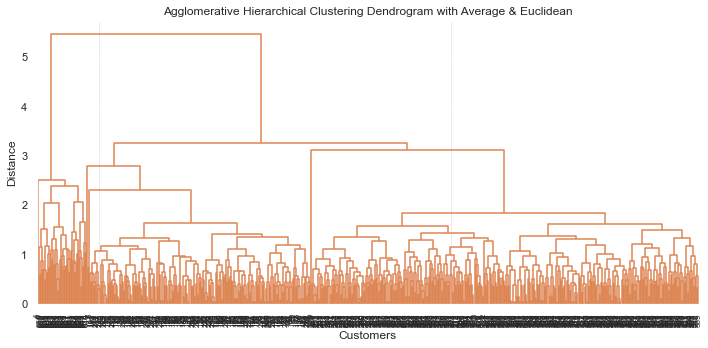

In [120]:
Z_ae = linkage(credit_drop_df_hz, method='average', metric='euclidean')
c, coph_dists = cophenet(Z_ae , pdist(credit_drop_df_hz))
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram with Average & Euclidean')
plt.xlabel('Customers')
plt.ylabel('Distance')
dendrogram(Z_ae, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

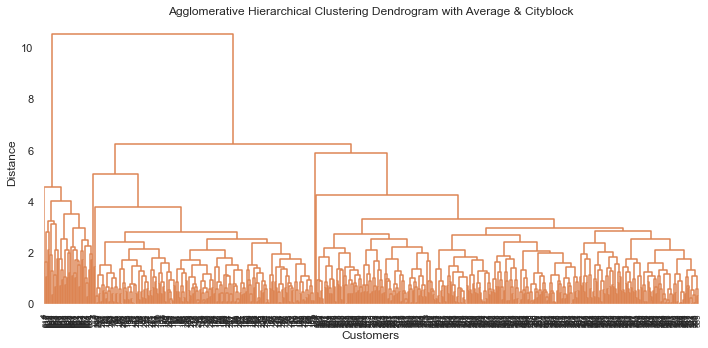

In [121]:
Z_ac = linkage(credit_drop_df_hz, method='average', metric='cityblock')
c, coph_dists = cophenet(Z_ac , pdist(credit_drop_df_hz))
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram with Average & Cityblock')
plt.xlabel('Customers')
plt.ylabel('Distance')
dendrogram(Z_ac, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

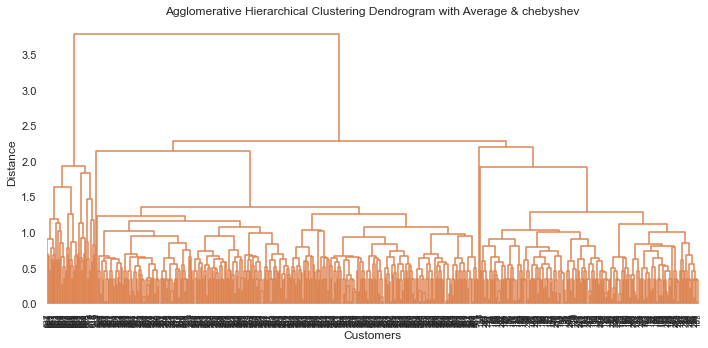

In [122]:
Z_av = linkage(credit_drop_df_hz, method='average', metric='chebyshev')
c, coph_dists = cophenet(Z_av , pdist(credit_drop_df_hz))
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram with Average & chebyshev')
plt.xlabel('Customers')
plt.ylabel('Distance')
dendrogram(Z_av, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

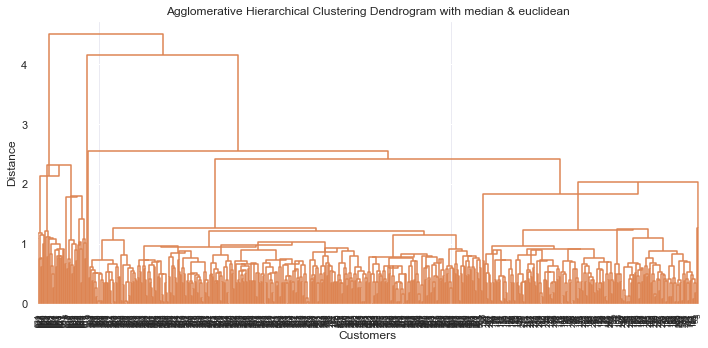

In [123]:
Z_me = linkage(credit_drop_df_hz, method='median', metric='euclidean')
c, coph_dists = cophenet(Z_me , pdist(credit_drop_df_hz))
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram with median & euclidean')
plt.xlabel('Customers')
plt.ylabel('Distance')
dendrogram(Z_me, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

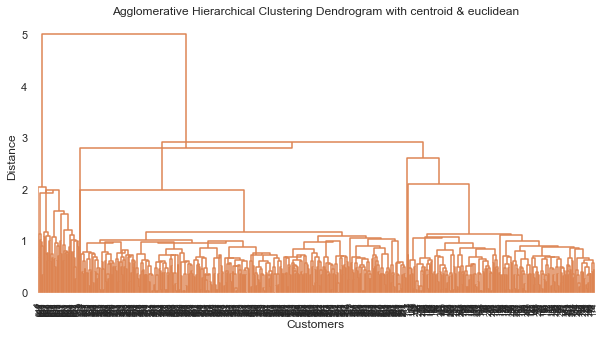

In [124]:
Z_ce = linkage(credit_drop_df_hz, method='centroid', metric='euclidean')
c, coph_dists = cophenet(Z_ce , pdist(credit_drop_df_hz))
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram with centroid & euclidean')
plt.xlabel('Customers')
plt.ylabel('Distance')
dendrogram(Z_ce, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.show()

### All the dendrograms are hard to read as the original dataset has 660 datapoints(customers). Truncation is used to condense the dendrogram. And we need to decide on the truncation level. For truncation level, we need to know the optimal clusters. Let's use AgglomerativeClustering to get the pdist, silhouette score and check for optimal k for each possible combination of the metric and method

### From sklearn, scipy pages..I see that Agglomerative can take for affinity the following parameters : euclidean, l1, l2, manhattan, cosine, precomputed. And for linkage: 'ward’, ‘complete’, ‘average’, ‘single’. 
### Then for our purposes from above dendrograms we cannot use median or centroid linkage. We have to go with 'average'. For affinity we can use only euclidean, and manhattan (=should be same as cityblock)

2 0.5703183487340514
3 0.515922432650965
4 0.47495143595793504
5 0.44039753024783956
6 0.4153547954831452
7 0.41837756746720256
8 0.34306710358280806
9 0.34154869328908927
10 0.34550947121387965


Text(0.5, 1.0, 'Selecting k with the Elbow Method Using Silhouette for average and euclidean')

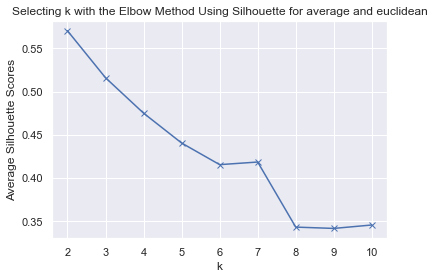

In [130]:
starth=2 # did not use 1 as single cluster doesn't make sense.
endh=11
clustersh=range(starth, endh) 
meanDistortionsh=[]
clusterIntertiah=[]
silhouetteh=[]
for k in clustersh:
    modelh=AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
    predictionh=modelh.fit_predict(credit_drop_df_hz)
    #predictionh=modelh.predict(credit_drop_df_hz)
    #dist=sum(np.min(cdist(credit_drop_df_hz, model.cluster_centers_, 'euclidean'), axis=1))/ credit_drop_df_z.shape[0]
    #meanDistortions.append(dist)
    #clusterIntertia.append(model.inertia_)
    silh=silhouette_score(credit_drop_df_hz, modelh.labels_, metric='euclidean')
    print(k, silh)
    silhouetteh.append(silh)
    #print("k = {}".format(h), prediction)
    #print("k ={} and dist = {}".format(k, dist))
    
plt.plot(clustersh, silhouetteh, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Silhouette Scores')
plt.title('Selecting k with the Elbow Method Using Silhouette for average and euclidean')

2 0.5703183487340514
3 0.515922432650965
4 0.47495143595793504
5 0.44039753024783956
6 0.4153547954831452
7 0.28764866722117594
8 0.2890653052313269
9 0.24412140323667025
10 0.24647522612328884


Text(0.5, 1.0, 'Selecting k with the Elbow Method Using Silhouette for average and manhattan')

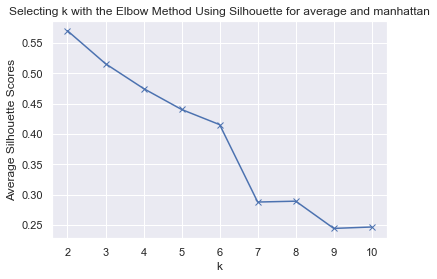

In [134]:
starth1=2 # did not use 1 as single cluster doesn't make sense.
endh1=11
clustersh1=range(starth1, endh1) 
silhouetteh1=[]
for k in clustersh1:
    modelh1=AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
    predictionh1=modelh1.fit_predict(credit_drop_df_hz)
    #predictionh=modelh.predict(credit_drop_df_hz)
    #dist=sum(np.min(cdist(credit_drop_df_hz, model.cluster_centers_, 'euclidean'), axis=1))/ credit_drop_df_z.shape[0]
    #meanDistortions.append(dist)
    #clusterIntertia.append(model.inertia_)
    silh1=silhouette_score(credit_drop_df_hz, modelh1.labels_, metric='euclidean')
    print(k, silh1)
    silhouetteh1.append(silh1)
    #print("k = {}".format(h), prediction)
    #print("k ={} and dist = {}".format(k, dist))
    
plt.plot(clustersh1, silhouetteh1, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Silhouette Scores')
plt.title('Selecting k with the Elbow Method Using Silhouette for average and manhattan')

### From the above elbow graphs, we see that cluster size of 2 is the best with Silhouette score of 0.57. Let's use 2 clustering for the truncation of dendrograms

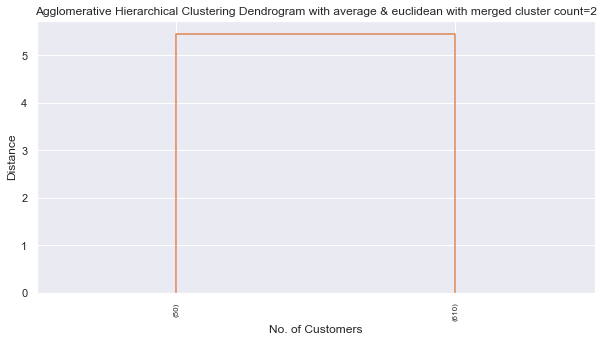

In [138]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram with average & euclidean with merged cluster count=2')
plt.xlabel('No. of Customers')
plt.ylabel('Distance')
dendrogram(Z_ae, p=2, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.show()

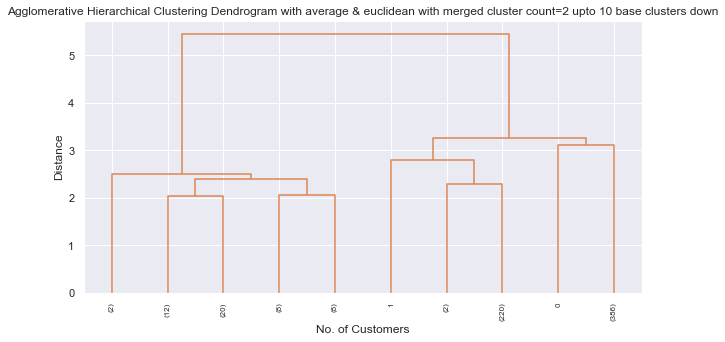

In [149]:
# A little more drilled down to 10 base clusters
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram with average & euclidean with merged cluster count=2 upto 10 base clusters down')
plt.xlabel('No. of Customers')
plt.ylabel('Distance')
dendrogram(Z_ae, p=10, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.show()

## I will now iterate agglomerative with cluster size 2 with affinity and linkage as euclidean and average respectively

In [153]:
agModel=AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
prediction_agModel=agModel.fit_predict(credit_drop_df_hz)
prediction_agModel

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [154]:
#Append the prediction 
credit_df_h["CLUSTER#"] = prediction_agModel
credit_drop_df_hz["CLUSTER#"] = prediction_agModel
print("Clusters Assigned : \n")
credit_df_h.head()

Clusters Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,CLUSTER#
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,1


In [155]:
credit_df_h['CLUSTER#'].value_counts()

0    610
1     50
Name: CLUSTER#, dtype: int64

In [156]:
# Provides count for each cluster
credit_df_h.groupby('CLUSTER#').count()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
CLUSTER#,,,,,,,
0,610,610,610,610,610,610,610
1,50,50,50,50,50,50,50


In [157]:
# This provides each cluster's mean values across the variables.
credit_df_h.groupby('CLUSTER#').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
CLUSTER#,,,,,,,
0,307.485246,55012.97541,25847.540984,4.37541,2.55082,1.92623,3.788525
1,611.280000,56708.76000,141040.000000,8.74000,0.60000,10.90000,1.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000289C2E2E9D0>,
      dtype=object)

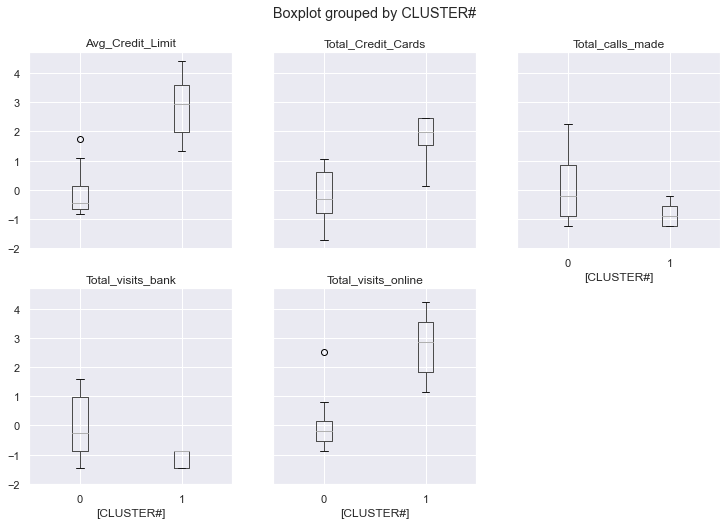

In [159]:
credit_drop_df_hz.boxplot(by='CLUSTER#', layout = (2,3),figsize=(12,8)) # use the scaled df as we are concentrated on the ones to which clustering is made

## INFERENCE with k=2 for the Hierarchical Clustering

#### From the box plot and the mean & count values of variables when grouped by Cluster#, we observe the following customer segmentation:

- The cluster 0 denotes customers with least avg_Credit_limit (26K) and least total_credit_cards (mean 4.4). The no. of customers in this segement is 610 about 90% of the total datasample. We can further observe that this segment of customers prefer Call method to contact bank followed by visiting in person. (this is given by the mean and the boxplot). They tend not to do online banking often.

 
- The cluster 1 denotes customers with highest avg_Credit_limit (~141K) and highest total_credit_cards (mean 8.75). The no. of customers in this segement is the least (50) that is < 10% of the total datasample. We can further observe that this segment of customers prefer online method of communication with the bank.



- SILHOUETTE SCORE when k=2 is : 0.5703

### Calculate Average Silhouette Score for both methods

- For KMeans with Cluster size =3, we see that the average SILHOUETTE Score is 0.5399 and this is the closet value to +1
- For Hierarchical Agglomerative Clusring, we see that average SILHOUETTE Score is 0.5703 (and this is the closet value to +1) and this happens when cluster size =2.

### Compare K-Means Clusters with Hierarchical Clusters

#### Kmeans
    - Kmeans is a centroid based clustering algorithm
    - Here, initial random # of labelled centroid seeds are chosen and distances of the datapoints to these centroids are computed (using euclidean usually) and then datapoints that are closest to a centroid and grouped together including the random chosen centroid. 
    - With the new set of clusters, now the mean of the datapoints is taken and a new centroid is arrived at for each cluster. And then the iteration starts of calculating each datapoints spatial distance to the nearest centroid and getting grouped & labelled.
    - It will be observed that during Kmeans the datapoints will move from one centroid label (cluster) to another as the iteration goes and a new centroid is computed
    - The iteration continues till there are no more movement of the datapoints and we arrive at the stable state.
    - Average Silhouette score is one of the main metric to compute and this indicates the measure of good clustering. Score closer to +1 for a particular number of clustering indicates optimal cluster count.
    - Total distance calculation in one iteration is K*n (K=selected no. of clusters, n=no. of datapoints)
    
#### Hierarchical (discussing Agglomoreative)
    - We generally use both sklearn's class Agglomorative in conjunction with scipy's hierarchy class to arrive at optimal clusters
    - This is more conection based wherein pairwise distance is measured and the datapoints closest to one another are grouped as a cluster
    - Then with the new cluster along the rest of the datapoints the pairwise distance is computed and then the nearest datapoints with each other or datapoint to the cluster created above are grouped together to form a new cluster.
    - The cluster to cluster distance is measured by linkage wherein different methods like nearest(single), farthest(complete) etc., are chosen to compute the distance between clusters. (measurement technique can be euclidean or cityblock etc.). 
    - Based on the different linkages made to get to the single monolith cluster. The differenct is mainly in terms of method of combining the datapoints/clusters and the measure used to do so. 
    - A score called cophentic is calculated which is a correlation between the distance at which the linkages between 2 datapoints are done to the pairwise distance computation of the same. If the correlation is strong +1 then that combination of calculation is best to choose and draw the dendrogram.
    - Here, too average silhouette score is calculated to measure the clustering and the # of clusters.
    
- Computation wise Hierarchical takes a long time as it has to calculate distance pair-wise.  (n*(n-1)/2) times. Whereas, KMeans is much quicker. 
- Selection of # of clusters is very random for KMeans. Initial selection of centroids holds key to proper clustering

#### In our example/scenario, although the hierarchical clustering(via agglomorative clustering) has a better silhouette score, but the # of clusters created is 2. On further analysis of the clusters with mean value of the variables, it is not sufficiently grouped based on contact method.

#### Whereas, in KMeans compartively for this segmentation scenario, the interpretation is better on the cluster segmentation. We can clearly see that customers going online method of contact tend to have higher crdt limit and higher # of cards. And customers with least avg crdt limit and lowest no. of cards go for phone call method of communication. 

## Analysis of the clusters formed and how is one cluster different from another and answer all key questions

### From the Hierarchical Clustering we were able to segementize the customers into 2 broad categories - 

#### Cluster A: Segment of customers who have high avg credit limit and higher no. of credit cards follow Online mode of contact with bank. 

#### Cluster B: Segment of customers who do not have high avg credit limit and lower no. of credit cards follow Non-Online mode of contact with the bank. 

### Whereas, the Kmeans Clustering we were able to segementize the customers into further additional so net 3 broad categories - 

#### Cluster A: Segment of customers who have high avg credit limit and higher no. of credit cards follow Online mode of contact with bank. 

#### Cluster B: Segment of customers who have medium avg credit limit and medium no. of credit cards follow Non-Online mode of contact with the bank especially visiting bank (probably using check level transactions)

#### Cluster C: Segment of customers who have least credit and no. of credit cards follow Non-online as well especially by calling the bank (phone level transaction or query)


##### Key Question here can be:
- How and to whom can Bank sell more upcoming products of bank like investments(like RDs, CDs, etc,)?
    - Here, based on the hierarchical clustering we can say Cluster A where the customers have high appetite to transact due to high crdt limit and max number of cards, any marketing to be done via online as they prefer online contact. Any advt to attract customer should be via emails, online login during transaction etc., whereas for customers in Clusters B or C who tend to transact more in person or via phone calls, the selling should be more interpersonal for such customers. It would require more interpersonal and negotiating skilss to convince such customers to buy more bank products.
    
    
- How can you make customers in the low crdt level move to higher crdt level clusters?
    - Well, this can be tricky as the given dataset doesn't provide any income or savings related information for which we would need more data insights from the data collection mode. But, that being said given the data information, we can select such customers who call in more or visit more, and start educating them on the online mode of communication and explain the benefits of digital products. This in turn will be a win-win situation for bank and for customer - a. in terms of possible higher no. of cards and incentivize such customers by giving cards with low crdt limit and make them use cards more online. b. convenience for the customers in terms of visits or personal interaction.   
